In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
# File location and type
file_location = "/FileStore/tables/Time_Wasters_on_Social_Media.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)



In [0]:
df.schema

Out[4]: StructType([StructField('UserID', IntegerType(), True), StructField('Age', IntegerType(), True), StructField('Gender', StringType(), True), StructField('Location', StringType(), True), StructField('Income', IntegerType(), True), StructField('Debt', BooleanType(), True), StructField('Owns Property', BooleanType(), True), StructField('Profession', StringType(), True), StructField('Demographics', StringType(), True), StructField('Platform', StringType(), True), StructField('Total Time Spent', IntegerType(), True), StructField('Number of Sessions', IntegerType(), True), StructField('Video ID', IntegerType(), True), StructField('Video Category', StringType(), True), StructField('Video Length', IntegerType(), True), StructField('Engagement', IntegerType(), True), StructField('Importance Score', IntegerType(), True), StructField('Time Spent On Video', IntegerType(), True), StructField('Number of Videos Watched', IntegerType(), True), StructField('Scroll Rate', IntegerType(), True), St

In [0]:
# display(df)

UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
1,56,Male,Pakistan,82812,true,true,Engineer,Rural,Instagram,80,17,4229,Pranks,24,7867,5,26,22,87,Night,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
2,46,Female,Mexico,27999,false,true,Artist,Urban,Instagram,228,14,2131,Pranks,19,5944,6,25,31,46,Afternoon,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
3,32,Female,United States,42436,false,true,Engineer,Rural,Facebook,30,6,4367,Vlogs,19,8674,3,9,7,88,Evening,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
4,60,Male,Barzil,62963,true,false,Waiting staff,Rural,YouTube,101,19,1507,Vlogs,4,2477,2,6,41,93,Night,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
5,25,Male,Pakistan,22096,false,true,Manager,Urban,TikTok,136,6,2159,Gaming,19,3093,7,13,21,4,Morning,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
6,38,Male,Vietnam,45279,false,false,driver,Urban,Instagram,89,18,2917,Jokes/Memes,9,8534,5,27,16,38,Night,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
7,56,Male,India,46201,false,false,Students,Rural,TikTok,247,5,3230,Vlogs,16,7207,9,22,20,63,Morning,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
8,36,Male,Barzil,39715,false,false,Engineer,Rural,Instagram,191,6,9859,Entertainment,27,9654,3,28,43,29,Night,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
9,40,Male,United States,49309,false,false,Waiting staff,Rural,Instagram,34,2,6266,Vlogs,4,9394,8,20,44,19,Night,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data
10,28,Other,United States,35078,false,false,Students,Rural,YouTube,165,8,4137,ASMR,6,9813,6,4,47,91,Evening,6,4,Boredom,Smartphone,iOS,2:00 PM,8,2,At home,Mobile Data


Which Reason Do Users Spend Time on Social Media?

      Watch Reason  User Count  Total Time Spent  Average time
0            Habit         339             53883    158.946903
1          Boredom         277             40137    144.898917
2    Entertainment         264             39564    149.863636
3  Procrastination         120             17822    148.516667


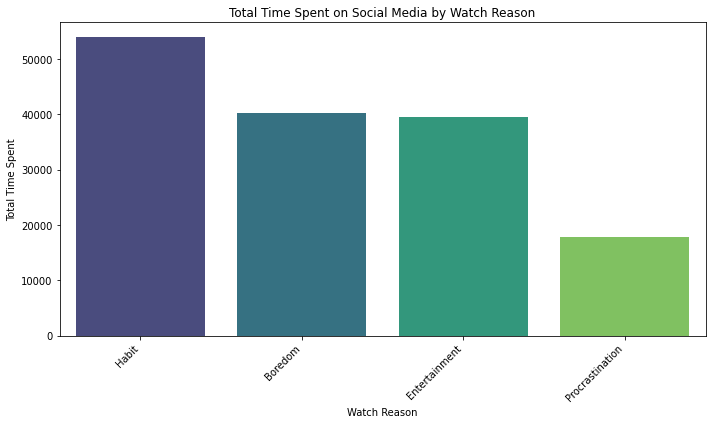

In [0]:
df1  = df.groupBy('Watch Reason').agg(
    count('UserID').alias('User Count'),
    sum('Total Time Spent').alias('Total Time Spent'),
    avg('Total Time Spent').alias('Average time')
).orderBy(desc('Total Time Spent')).toPandas()

# df1.show()
print(df1)

plt.figure(figsize=(10,6))
sns.barplot(x='Watch Reason', y='Total Time Spent', data=df1, palette='viridis')
plt.title('Total Time Spent on Social Media by Watch Reason')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Total Time Spent')
plt.xlabel('Watch Reason')
plt.tight_layout()
plt.show()

Which Age Category Spends More Time on Social Media?

  Age Category  User Count  Total Time Spent  average time
0          60+         100              1486     14.860000
1        41-59         428              6567     15.343458
2        19-40         447              6522     14.590604
3         0-18          25               398     15.920000


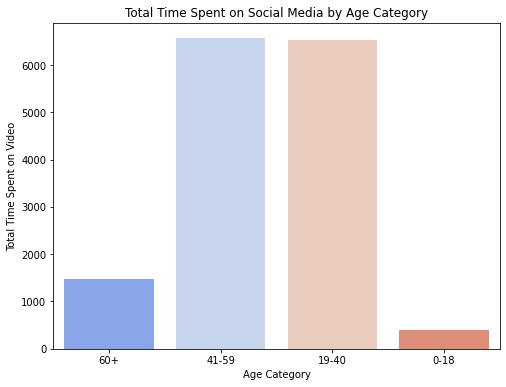

In [0]:
# Define age categories
age_bins = when(df['Age'] <= 18, '0-18')\
             .when((df['Age'] >= 19) & (df['Age'] <= 40), '19-40')\
             .when((df['Age'] >= 41) & (df['Age'] <= 59), '41-59')\
             .otherwise('60+')

df2 = df.withColumn('Age Category', age_bins)\
    .groupBy('Age Category')\
    .agg(
        count('UserID').alias('User Count'),
        sum('Time Spent On Video').alias('Total Time Spent'),
        avg('Time Spent On Video').alias('average time')
    ).orderBy(desc('Age Category'))\
    .toPandas()
print(df2)       

plt.figure(figsize=(8,6))
sns.barplot(x='Age Category', y='Total Time Spent', data=df2, palette='coolwarm')
plt.title('Total Time Spent on Social Media by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Time Spent on Video')
plt.show()


Which Age Category is More Likely to Lose Productivity?

  Age Category  Average Productivity Loss
0        41-59                   5.221963
1        19-40                   5.143177
2         0-18                   5.120000
3          60+                   4.740000


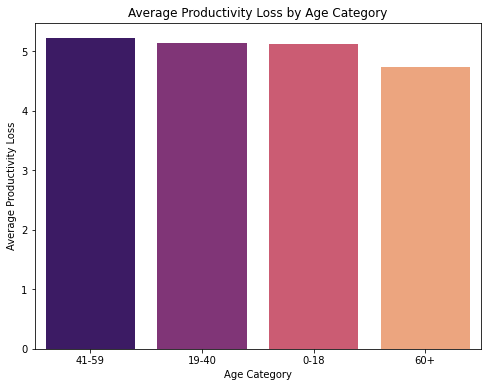

In [0]:
df3  = df.withColumn('Age Category', age_bins)\
    .groupBy('Age Category')\
    .agg(
        avg('ProductivityLoss').alias('Average Productivity Loss')
    ).orderBy(desc('Average Productivity Loss')).toPandas()

print(df3)

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Age Category', y='Average Productivity Loss', data=df3, palette='magma')
plt.title('Average Productivity Loss by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Productivity Loss')
plt.show()

Wi-Fi vs Mobile Internet Addiction

In [0]:
df.groupBy('ConnectionType')\
    .agg(avg('Addiction Level').alias('Average Addiction Level')).show()

+--------------+-----------------------+
|ConnectionType|Average Addiction Level|
+--------------+-----------------------+
|         Wi-Fi|     2.8343949044585988|
|   Mobile Data|      2.938775510204082|
+--------------+-----------------------+



When Do People Spend More Time on the Platform?

   Frequency  Total Time Spent
0    Evening             56757
1    Morning             15646
2  Afternoon             32400
3      Night             46603


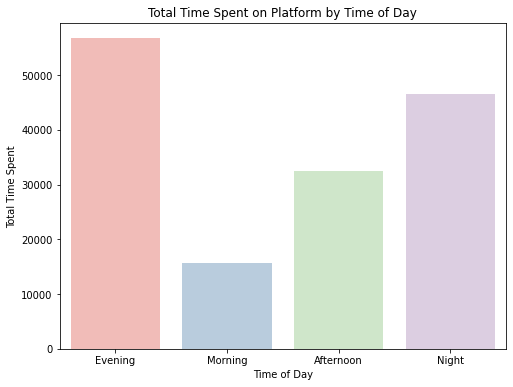

In [0]:
# Processed PySpark DataFrame from Q5
df4 = df.groupBy('Frequency')\
    .agg(sum('Total Time Spent').alias('Total Time Spent')).toPandas()

print(df4)
# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Frequency', y='Total Time Spent', data=df4, palette='Pastel1')
plt.title('Total Time Spent on Platform by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Time Spent')
plt.show()

In [0]:
# # Ensure that 'Total Time Spent' is numeric by filtering out non-numeric values
# # Convert 'Total Time Spent' to integer
# df_filtered = df.withColumn('Total Time Spent', df['Total Time Spent'].cast('int'))

# # Filter out nulls or invalid values in 'Total Time Spent' column
# df_filtered = df_filtered.filter(df_filtered['Total Time Spent'].isNotNull())

# Group by Platform and sum the Total Time Spent
df_platform = df.groupBy('Platform')\
    .agg(sum('Total Time Spent').alias('Total Time Spent'))\
    .orderBy(desc('Total Time Spent'))\
    .toPandas()

# Print the Pandas DataFrame to check results
print(df_platform)

    Platform  Total Time Spent
0     TikTok             41297
1    YouTube             38205
2  Instagram             37609
3   Facebook             34295


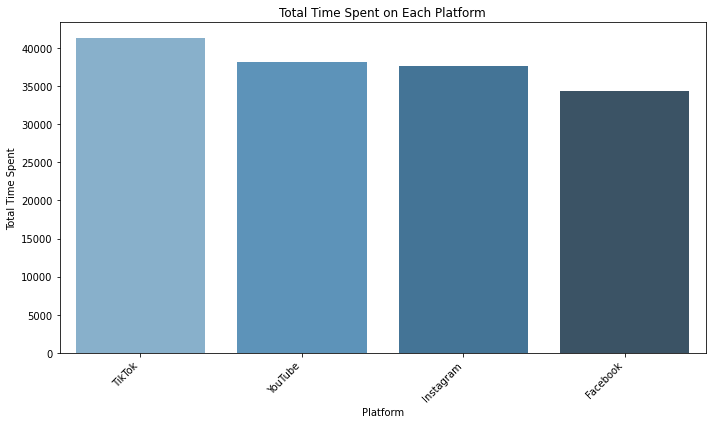

In [0]:
# Plotting the Total Time Spent by Platform
plt.figure(figsize=(10,6))
sns.barplot(x='Platform', y='Total Time Spent', data=df_platform, palette='Blues_d')
plt.title('Total Time Spent on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Total Time Spent')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

On which Platform which category's videos people prefer to watch ?

In [0]:
# Group by Platform and Video Category and sum the Time Spent On Video
df_platform_category = df.groupBy('Platform', 'Video Category')\
    .agg(sum('Time Spent On Video').alias('Total Time Spent'))\
    .orderBy('Platform',desc('Total Time Spent'))\
    .toPandas()

# Print the Pandas DataFrame
print(df_platform_category)

     Platform Video Category  Total Time Spent
0    Facebook    Jokes/Memes               586
1    Facebook          Vlogs               531
2    Facebook         Pranks               413
3    Facebook     Life Hacks               397
4    Facebook  Entertainment               369
5    Facebook         Gaming               322
6    Facebook           ASMR               296
7    Facebook         Trends               283
8    Facebook         Comedy                33
9   Instagram    Jokes/Memes               612
10  Instagram     Life Hacks               563
11  Instagram          Vlogs               442
12  Instagram         Pranks               434
13  Instagram         Gaming               426
14  Instagram         Trends               408
15  Instagram           ASMR               349
16  Instagram  Entertainment               346
17  Instagram         Comedy               203
18     TikTok    Jokes/Memes               788
19     TikTok     Life Hacks               750
20     TikTok

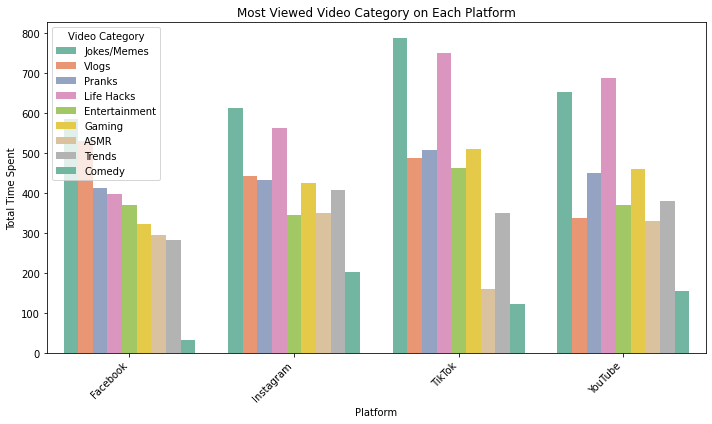

In [0]:
# Plotting the most viewed category on each platform
plt.figure(figsize=(10,6))
sns.barplot(x='Platform', y='Total Time Spent', hue='Video Category', data=df_platform_category, palette='Set2')
plt.title('Most Viewed Video Category on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Total Time Spent')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Video Category')
plt.tight_layout()
plt.show()


Average time by users from different countries 

In [0]:
# Group by Location (Country) and calculate the average time spent on social media
df_country_avg = df.groupBy('Location')\
    .agg(avg('Total Time Spent').alias('Average Time Spent'))\
    .orderBy(desc('Average Time Spent'))\
    .toPandas()

# Print the result
print(df_country_avg)

        Location  Average Time Spent
0    Philippines          164.076923
1          Japan          163.666667
2         Mexico          160.547945
3       Pakistan          156.855263
4  United States          151.557471
5          India          151.162281
6      Indonesia          147.129870
7         Barzil          146.153846
8        Vietnam          139.073171
9        Germany          130.898305


In [0]:
# Ensure both 'Total Time Spent' and 'Time Spent On Video' are numeric
df_filtered = df.withColumn('Total Time Spent', df['Total Time Spent'].cast('int'))\
                .withColumn('Time Spent On Video', df['Time Spent On Video'].cast('int'))

# Filter out rows with null values
df_filtered = df_filtered.filter(df_filtered['Total Time Spent'].isNotNull() & df_filtered['Time Spent On Video'].isNotNull())

# Calculate Pearson correlation between 'Total Time Spent' and 'Time Spent On Video'
correlation = df_filtered.stat.corr('Total Time Spent', 'Time Spent On Video')
print(f'Correlation between Total Time Spent and Time Spent On Video: {correlation}')


Correlation between Total Time Spent and Time Spent On Video: 0.053318761224081


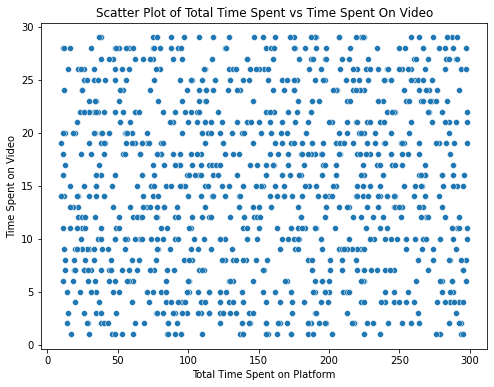

In [0]:
# Convert to Pandas for visualization
df_pandas = df_filtered.select('Total Time Spent', 'Time Spent On Video').toPandas()

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Time Spent', y='Time Spent On Video', data=df_pandas)
plt.title('Scatter Plot of Total Time Spent vs Time Spent On Video')
plt.xlabel('Total Time Spent on Platform')
plt.ylabel('Time Spent on Video')
plt.show()


Result : Not related. DO have to research and try again with some different strategies.

Let us do some Exploratory Data Analysis (EDA).

In [0]:
# Select only numerical columns for correlation analysis
df_numerical = df.select('ProductivityLoss', 'Total Time Spent', 'Income','Addiction Level', 'Self Control')

# Cast columns to integer to ensure proper correlation calculations
df_numerical = df_numerical.withColumn('ProductivityLoss', df_numerical['ProductivityLoss'].cast('int'))\
                           .withColumn('Total Time Spent', df_numerical['Total Time Spent'].cast('int'))\
                           .withColumn('Income', df_numerical['Income'].cast('int'))

# Convert to Pandas DataFrame for correlation and heatmap
df_numerical_pandas = df_numerical.toPandas()

# Calculate the correlation matrix
correlation_matrix = df_numerical_pandas.corr()

# Print correlation matrix
print(correlation_matrix)


                  ProductivityLoss  Total Time Spent    Income  \
ProductivityLoss          1.000000         -0.014210  0.040670   
Total Time Spent         -0.014210          1.000000  0.013326   
Income                    0.040670          0.013326  1.000000   
Addiction Level          -0.994939          0.016086 -0.039181   
Self Control              0.994939         -0.016086  0.039181   

                  Addiction Level  Self Control  
ProductivityLoss        -0.994939      0.994939  
Total Time Spent         0.016086     -0.016086  
Income                  -0.039181      0.039181  
Addiction Level          1.000000     -1.000000  
Self Control            -1.000000      1.000000  


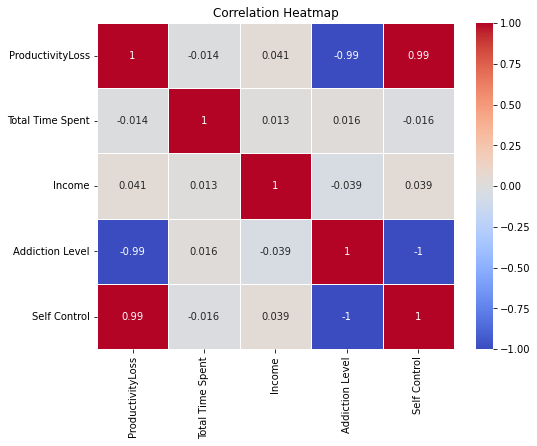

In [0]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


There is strong relation between ProductivityLoss and Self Control. Let us make a prediction model and check we are able to make good model or not.

In [0]:
from pyspark.ml.feature import VectorAssembler

# Select relevant columns
df_model_data = df.select('ProductivityLoss', 'Self Control')

# Create a VectorAssembler to combine features into a single feature vector
assembler = VectorAssembler(inputCols=['Self Control'], outputCol='features')
df_vector = assembler.transform(df_model_data)

# Select features and label
df_model_ready = df_vector.select('features', 'ProductivityLoss')

# Show the prepared DataFrame
df_model_ready.show(5)


+--------+----------------+
|features|ProductivityLoss|
+--------+----------------+
|   [5.0]|               3|
|   [7.0]|               5|
|   [8.0]|               6|
|   [5.0]|               3|
|  [10.0]|               8|
+--------+----------------+
only showing top 5 rows



In [0]:
# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = df_model_ready.randomSplit([0.8, 0.2], seed=1234)

In [0]:
from pyspark.ml.regression import LinearRegression

# Initialize the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='ProductivityLoss')

# Train the model
lr_model = lr.fit(train_data)


In [0]:
# Make predictions
predictions = lr_model.transform(test_data)

# Show the predictions
predictions.select('features', 'ProductivityLoss', 'prediction').show(5)

# Evaluate the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol='ProductivityLoss', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print(f'Root Mean Squared Error (RMSE): {rmse}')


+--------+----------------+------------------+
|features|ProductivityLoss|        prediction|
+--------+----------------+------------------+
|   [3.0]|               1|0.9303586658282459|
|   [3.0]|               1|0.9303586658282459|
|   [3.0]|               1|0.9303586658282459|
|   [3.0]|               1|0.9303586658282459|
|   [3.0]|               1|0.9303586658282459|
+--------+----------------+------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE): 0.2635481183444659


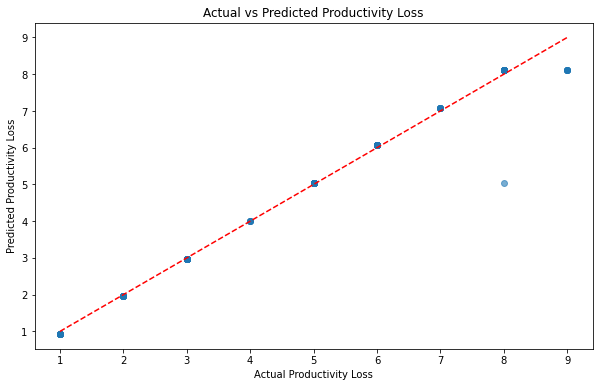

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert predictions to Pandas DataFrame for visualization
predictions_pd = predictions.select('ProductivityLoss', 'prediction').toPandas()

# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['ProductivityLoss'], predictions_pd['prediction'], alpha=0.6)
plt.plot([predictions_pd['ProductivityLoss'].min(), predictions_pd['ProductivityLoss'].max()],
         [predictions_pd['ProductivityLoss'].min(), predictions_pd['ProductivityLoss'].max()],
         color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Productivity Loss')
plt.xlabel('Actual Productivity Loss')
plt.ylabel('Predicted Productivity Loss')
plt.show()


In [0]:
r2 = lr_model.summary.r2
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.991294255862853


That shows that our model is around 99% Accurate. I think it is considered good module.

Let us go and do some magical things with categorical values.

In [0]:
# Group by 'Video Category' and calculate the average or total engagement per category
df_video_engagement = df.groupBy('Video Category') \
                        .agg({'Engagement': 'avg'}) \
                        .withColumnRenamed('avg(Engagement)', 'Average Engagement') \
                        .orderBy('Average Engagement', ascending=False)

# Show the result
df_video_engagement.show(truncate=False)


+--------------+------------------+
|Video Category|Average Engagement|
+--------------+------------------+
|Trends        |5407.7            |
|Life Hacks    |5263.87037037037  |
|Vlogs         |5252.798245614035 |
|Pranks        |5144.090909090909 |
|Jokes/Memes   |4958.039106145251 |
|Comedy        |4940.228571428572 |
|Entertainment |4812.5392156862745|
|Gaming        |4501.621848739495 |
|ASMR          |4455.7468354430375|
+--------------+------------------+



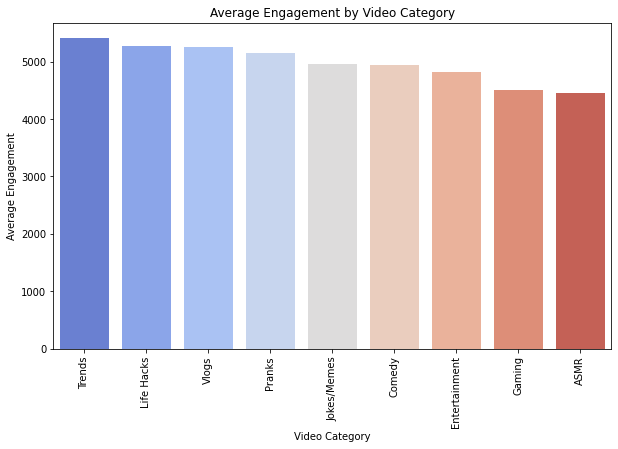

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame for visualization
df_video_engagement_pd = df_video_engagement.toPandas()

# Plotting the data using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Video Category', y='Average Engagement', data=df_video_engagement_pd, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Engagement by Video Category')
plt.xlabel('Video Category')
plt.ylabel('Average Engagement')
plt.show()


In [0]:
# Group by 'Video Category' and calculate summary statistics for engagement
df_video_stats = df.groupBy('Video Category') \
                   .agg({'Engagement': 'mean', 'Engagement': 'median', 'Engagement': 'stddev'}) \
                   .withColumnRenamed('mean(Engagement)', 'Mean Engagement') \
                   .withColumnRenamed('median(Engagement)', 'Median Engagement') \
                   .withColumnRenamed('stddev(Engagement)', 'StdDev Engagement')

# Show the result
df_video_stats.show(truncate=False)


+--------------+------------------+
|Video Category|StdDev Engagement |
+--------------+------------------+
|Gaming        |2965.6107382299897|
|Entertainment |2907.782856750355 |
|Life Hacks    |2870.886077727666 |
|Jokes/Memes   |2806.1460283046536|
|ASMR          |2944.26358155144  |
|Trends        |2856.2449336869063|
|Vlogs         |2991.050086951364 |
|Pranks        |2920.2143271394243|
|Comedy        |3071.9335268324594|
+--------------+------------------+



## Findings:
    1. Top 3 Categories by Engagement:
        Trends: 5407.7
        Life Hacks: 5263.87
        Vlogs: 5252.80
        These categories show the highest average engagement, meaning users are interacting with these types of content more frequently or intensely. This suggests that Trends, Life Hacks, and Vlogs are content types that hold people's attention and invite interaction, like comments, shares, or likes.
    2. Top 3 Categories with High Variability (StdDev):
        Comedy: 3071.93
        Vlogs: 2991.05
        Gaming: 2965.61
        These categories have the most variability in engagement, meaning user interaction can range from very low to very high for different videos in the same category. This suggests that content quality or relevance can vary widely within these categories, leading to diverse user responses.

%md
## Summary of Findings

- **High Engagement Video Categories**:
  - The categories **Trends**, **Life Hacks**, and **Vlogs** recorded the highest average user engagement.
  - These categories suggest that users are drawn to viral, practical, and personal content.

- **Lower, but Consistent Engagement**:
  - Categories like **ASMR** and **Gaming** showed lower engagement on average but with more consistency in user interactions.

- **Correlation Between Self Control and Productivity Loss**:
  - A strong positive correlation (0.99) was found between **Self Control** and **Productivity Loss**.
  - Users with lower self-control are more likely to experience productivity loss due to platform usage.

- **Predictive Model for Productivity Loss**:
  - A linear regression model predicting **Productivity Loss** based on **Self Control** yielded a low RMSE of **0.26**, indicating good accuracy.
  
- **Addiction Level and Connection Type**:
  - **Wi-Fi users** displayed higher addiction levels compared to those on other connection types.

- **Platform Usage and Engagement**:
  - Different platforms contributed to varying levels of user engagement, highlighting the importance of platform-specific content strategies.

- **No Strong Correlation Between Time Spent and Income**:
  - Minimal correlation was observed between **time spent on the platform** and **income** or **engagement**, suggesting that these factors are not strongly related.

Overall, these findings offer valuable insights into how video categories, user behavior, and platform attributes affect engagement and productivity.
